In [2]:
import pandas as pd
%matplotlib inline

In [3]:
from pathlib import Path
csvpath = Path('../data/cleandata/Data.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.head()

,Crude1,WTI_Midland,Brent,RBOB,Ethanol,Corn,CAD_Heavy,VIX,ULSD,OPEC_Basket,RBOB_Crack,GC_ULSD_Crack,NY_ULSD_Crack,NG_HB,S_P,VLO
Date,,,,,,,,,,,,,,,,
2017-01-05,53.76,-0.06,56.89,1.6377,1.507,361.25,-15.044,13.025,1.6942,53.02,21.45,14.58,17.13,3.273,2264.3,60.913052
2017-01-06,53.99,-0.11,57.10,1.6340,1.551,358.00,-14.459,12.875,1.7032,53.50,21.45,14.69,17.27,3.285,2271.5,59.995037
2017-01-09,51.96,-0.22,54.94,1.5707,1.524,360.00,-14.296,12.925,1.6376,52.85,20.94,14.27,16.68,3.103,2265.0,59.734032
2017-01-10,50.82,-0.17,53.64,1.5467,1.503,358.25,-14.193,12.875,1.6114,51.46,21.15,14.44,16.72,3.278,2263.7,59.878029
2017-01-11,52.25,-0.17,55.10,1.5929,1.492,357.25,-14.232,12.525,1.6524,50.98,21.64,14.67,16.96,3.224,2270.6,60.373043


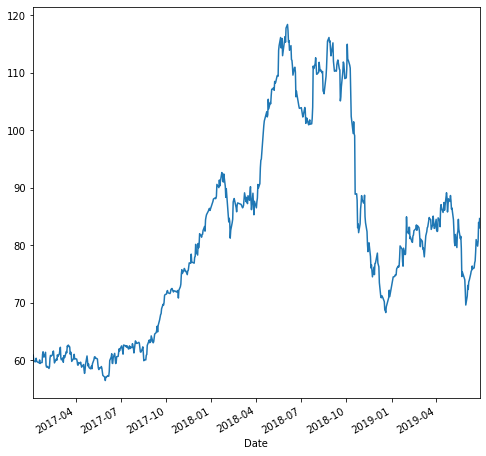

In [15]:
df.VLO.plot(figsize=(8,8))

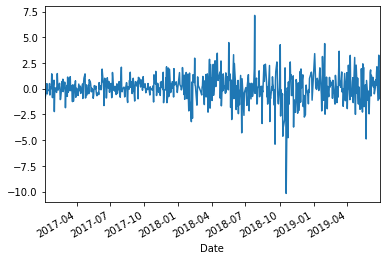

In [16]:
# Differencing the Settle price stationarizes the time series
df.VLO.diff().plot()

# Autocorrelation and Partial Autocorrelation Analysis

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

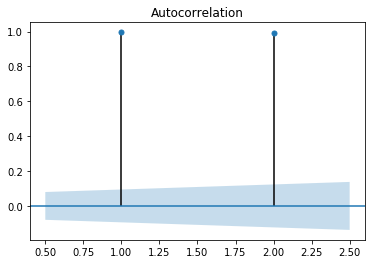

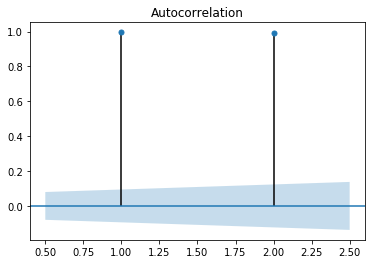

In [30]:
# Plot the autocorrelation of the Settle Prices
plot_acf(df.VLO, zero=False, lags=2)

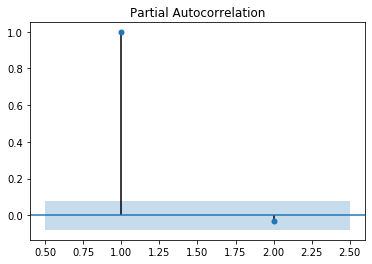

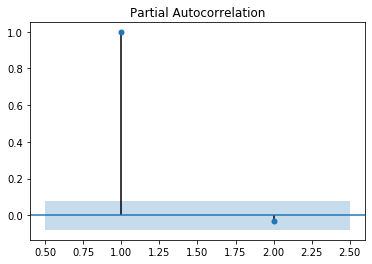

In [31]:
# Plot the partial autocorrelation of the returns
plot_pacf(df.VLO, zero=False, lags=2)

# ARIMA Model

In [35]:
from statsmodels.tsa.arima_model import ARIMA

In [36]:
# Create an ARIMA model
model = ARIMA(df.VLO.values, order=(2, 1, 1))

In [37]:
# Fit the model to the data
results = model.fit()

In [38]:
# Print the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  604
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1047.850
Method:                       css-mle   S.D. of innovations              1.371
Date:                Wed, 13 Nov 2019   AIC                           2105.701
Time:                        20:18:05   BIC                           2127.719
Sample:                             1   HQIC                          2114.269
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0408      0.075      0.541      0.589      -0.107       0.188
ar.L1.D.y      0.6872      0.172      4.005      0.000       0.351       1.023
ar.L2.D.y      0.0812      0.046      1.780      0.076      -0.008       0.171
ma.L1.D.y     -0.6866      0.169     -4.064      0.000      -1.018      -0.355
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2660           +0.0000j            1.2660            0.0000
AR.2           -9.7326           +0.0000j            9.7326            0.5000
MA.1            1.4564           +0.0000j            1.4564            0.0000
-----------------------------------------------------------------------------
"""

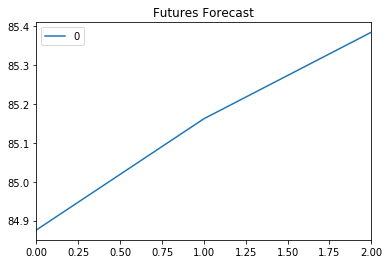

In [41]:
# Plot the Futures Price Forecast
pd.DataFrame(results.forecast(steps=3)[0]).plot(title="Futures Forecast")